# 1. Background: 
The Waterloo Museum of Art houses a diverse collection of artworks that reflect various cultures, periods, and artistic styles. The dataset includes detailed records of these artworks, capturing essential attributes such as Object ID, Department, Title, Artist Nationality, Object Dates, Medium, and more. This dataset serves as a critical resource for understanding the museum's collection, facilitating both internal analysis and external scholarly research. As a newly appointed Data Analyst at the Waterloo Museum of Art, your task is to preprocess this dataset to ensure its accuracy, completeness, and relevance before conducting any further analysis. The goal is to derive insights that can enhance the museum's outreach, educational programs, and collection management.

# 2. Objective: 
To clean and preprocess the dataset of the museum’s artworks, ensuring the data is ready for analysis to extract meaningful insights that can inform museum operations and enhance visitor engagement.

# 3. Key Inquiries:

1. Which artworks are most represented across different cultures and periods?
2. Are there any trends in the medium used over time?
3. How does the nationality of artists correlate with the artworks in the collection
4. What are the gaps in data that need to be addressed for better analysis?
5. Data: The dataset consists of 204 records and 41 columns, including both required and additional fields. Key columns include:

# 4. Data:
The dataset consists of 204 records and 41 columns, including both required and additional fields. Key columns include:

* Object ID: Unique identifier for each artwork.
* Department: The department under which the artwork is categorized.
* Object Name: The name of the artwork.
* Title: The title of the artwork.
* Culture: The cultural background of the artwork.
* Artist Nationality: The nationality of the artist.
* Object Begin Date: The start date of the period the artwork represents.
* Object End Date: The end date of the period the artwork represents.
* Medium: The material or technique used in the artwork.
* Credit Line: Information about the source of the artwork.
* Country: The country associated with the artwork.

The dataset also includes various categorical fields such as Period, Dynasty, Artist Role, and more, which provide additional context for the artworks. However, it contains missing values and irrelevant fields that need to be addressed during the data cleaning process.

### Import the necessary libraries - pandas, numpy, seaborn, matplotlib.pyplot

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns

### Read in the dataset

In [3]:
# Load the dataset (replace with the path to your CSV file)
file_path = 'Assignment1Data_Sample.csv'
data = pd.read_csv(file_path)

# copying data to another varaible to avoid any changes to original data
data = data.copy()

### View the first few rows of the dataset

In [4]:
# Display the first few rows to verify loading and observations
data.head()

Object Number  Object ID                Department          Object Name  \
0         62.16       1674  American Decorative Arts           Side Chair   
1       13.7.17       2430  American Decorative Arts              Pitcher   
2      33.85.11       6406  American Decorative Arts                Plate   
3    69.194.109       7616  American Decorative Arts            Soup bowl   
4   2006.235.20      15012  American Decorative Arts  Painting, miniature   

                Title   Culture Period Dynasty Reign Portfolio  ... Locale  \
0          Side Chair  American    NaN     NaN   NaN       NaN  ...    NaN   
1     Covered Pitcher  American    NaN     NaN   NaN       NaN  ...    NaN   
2               Plate     Dutch    NaN     NaN   NaN       NaN  ...    NaN   
3           Soup Bowl  American    NaN     NaN   NaN       NaN  ...    NaN   
4  Portrait of a Lady  American    NaN     NaN   NaN       NaN  ...    NaN   

  Locus Excavation River Classification Rights and Reproduction  \
0   NaN        NaN   NaN      Furniture                     NaN   
1   NaN        NaN   NaN       Ceramics                     NaN   
2   NaN        NaN   NaN       Ceramics                     NaN   
3   NaN        NaN   NaN       Ceramics                     NaN   
4   NaN        NaN   NaN      Paintings                     NaN   

                                       Link Resource   Metadata Date  \
0  http://www.metmuseum.org/art/collection/search...  5/13/2019 8:00   
1  http://www.metmuseum.org/art/collection/search...  5/13/2019 8:00   
2  http://www.metmuseum.org/art/collection/search...  5/13/2019 8:00   
3  http://www.metmuseum.org/art/collection/search...  5/13/2019 8:00   
4  http://www.metmuseum.org/art/collection/search...  5/13/2019 8:00   

                                 Repository                      Tags  
0  Metropolitan Museum of Art, New York, NY                    Chairs  
1  Metropolitan Museum of Art, New York, NY                  Pitchers  
2  Metropolitan Museum of Art, New York, NY                       NaN  
3  Metropolitan Museum of Art, New York, NY                     Bowls  
4  Metropolitan Museum of Art, New York, NY  Pendants|Portraits|Women  

[5 rows x 41 columns]

***Observations***

- **Department Focus**: All objects belong to the "American Decorative Arts" department, indicating an emphasis on decorative items.  
- **Cultural Origin**: Most items are labeled "American," with one exception—**Dutch** for the Plate.  
- **Object Variety**: The dataset includes diverse object types such as **furniture (Side Chair)**, **ceramics (Pitcher, Plate, Soup Bowl)**, and **miniature paintings**.  
- **Gaps in Period and Dynasty**: Several columns, including **Period**, **Dynasty**, and **Reign**, have missing values (NaN), suggesting incomplete historical metadata.  
- **Repository**: All objects are housed in the **Metropolitan Museum of Art, New York, NY**, reflecting a unified location for these artifacts.  
- **Classification Tags**: Some entries have specific tags like **"Chairs," "Bowls,"** and **"Portraits,"** but a few (like the Plate) lack any associated tags.  
- **Link Resources and Metadata Date**: Each object is associated with a museum link, with metadata last updated on **5/13/2019**.

### Check the shape of the dataset

In [5]:
data.shape

(204, 41)

* The dataset has 204 rows and 41 columns.

### Check the dataframe info

In [6]:
# Display columns
print("Columns in the DataFrame:")
print(data.columns.tolist())

# Describe numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(data.describe())

# Describe categorical columns
print("\nSummary for Categorical Columns:")
print(data.describe(include=['object']))

# Display DataFrame info
print("\nDataFrame Info:")
data.info()

Columns in the DataFrame:
['Object Number', 'Object ID', 'Department', 'Object Name', 'Title', 'Culture', 'Period', 'Dynasty', 'Reign', 'Portfolio', 'Artist Role', 'Artist Prefix', 'Artist Display Name', 'Artist Display Bio', 'Artist Suffix', 'Artist Nationality', 'Artist Begin Date', 'Artist End Date', 'Object Date', 'Object Begin Date', 'Object End Date', 'Medium', 'Dimensions', 'Credit Line', 'Geography Type', 'City', 'State', 'County', 'Country', 'Region', 'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification', 'Rights and Reproduction', 'Link Resource', 'Metadata Date', 'Repository', 'Tags']

Summary Statistics for Numeric Columns:
           Object ID  Object Begin Date  Object End Date
count     204.000000         204.000000       202.000000
mean   393179.387255        1293.377451      1362.876238
std    230139.277682        1337.679724      1231.242712
min      1674.000000       -7000.000000     -5000.000000
25%    216475.000000        1566.000000      1600.000

***Observations***
- **Missing Metadata**: Key historical fields such as **Period**, **Dynasty**, and **Reign** have a significant amount of missing data, with many non-null counts below 10.  
- **Concentration in a Single Repository**: All 204 objects are housed in the **Metropolitan Museum of Art, New York, NY**.  
- **Variety in Object Types**: The **Classification** column contains 61 unique values, with **Prints** being the most frequent (39 times).  
- **Temporal Range**: The dataset covers a wide time span, with **Object Begin Dates** ranging from **-7000 to 2003**.  

# Data Preprocessing

### Fixing the datatypes
### Getting the required columns

In [7]:
# Define the required columns
required_columns = [
    "Object ID", "Department", "Object Name", "Title", "Culture", 
    "Artist Nationality", "Object Begin Date", "Object End Date", 
    "Medium", "Credit Line", "Country"
]

# Keep only the relevant columns
cleaned_data = data[required_columns]

# Applying the categorical conversion
data[required_columns] = data[required_columns].astype('category')

# Display the first few rows after trimming down columns
cleaned_data.head()
cleaned_data

Object ID                Department          Object Name  \
0         1674  American Decorative Arts           Side Chair   
1         2430  American Decorative Arts              Pitcher   
2         6406  American Decorative Arts                Plate   
3         7616  American Decorative Arts            Soup bowl   
4        15012  American Decorative Arts  Painting, miniature   
..         ...                       ...                  ...   
199     779306       Drawings and Prints           Trade card   
200     785013       Drawings and Prints      Print; ephemera   
201     813925       Drawings and Prints                Print   
202     820618       Drawings and Prints                Print   
203     824428       Drawings and Prints                Print   

                                                 Title   Culture  \
0                                           Side Chair  American   
1                                      Covered Pitcher  American   
2                                                Plate     Dutch   
3                                            Soup Bowl  American   
4                                   Portrait of a Lady  American   
..                                                 ...       ...   
199  Packard-Tourist, from the "Antique Autos" seri...       NaN   
200  Norwegian Air Force In Canada Patrol Bomber (N...       NaN   
201                                         Stonehenge       NaN   
202  Psyche, holding the flask of beauty being tran...       NaN   
203                               Landscape and Cattle       NaN   

    Artist Nationality  Object Begin Date  Object End Date  \
0                  NaN               1794           1799.0   
1                  NaN               1700           1900.0   
2                  NaN               1740           1760.0   
3                  NaN               1885           1885.0   
4                  NaN               1840           1840.0   
..                 ...                ...              ...   
199                NaN               1953           1953.0   
200                NaN               1942           1942.0   
201                NaN               1979           1979.0   
202                NaN               1525           1535.0   
203                NaN               1875           1885.0   

                                      Medium  \
0    Mahogany, ebony, ash, birch, white pine   
1                                Earthenware   
2                                Earthenware   
3                                  Porcelain   
4                        Watercolor on ivory   
..                                       ...   
199              Commercial color lithograph   
200              Commercial color lithograph   
201        Sugar-lift aquatint with roulette   
202                                Engraving   
203                                  Etching   

                                           Credit Line        Country  
0              Friends of the American Wing Fund, 1962  United States  
1                                    Rogers Fund, 1913  United States  
2                                    Rogers Fund, 1933    Netherlands  
3            Gift of Mr. and Mrs. Franklin Chace, 1969  United States  
4                                  Fletcher Fund, 2006            NaN  
..                                                 ...            ...  
199  The Jefferson R. Burdick Collection, Gift of J...            NaN  
200  The Jefferson R. Burdick Collection, Gift of J...            NaN  
201                        Gift of Jerry S. Flum, 1980            NaN  
202                        Bequest of Grace Pugh, 1985            NaN  
203                         Gift of Henry Levien, 1967            NaN  

[204 rows x 11 columns]

In [8]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Object ID           204 non-null    int64  
 1   Department          203 non-null    object 
 2   Object Name         203 non-null    object 
 3   Title               194 non-null    object 
 4   Culture             84 non-null     object 
 5   Artist Nationality  87 non-null     object 
 6   Object Begin Date   204 non-null    int64  
 7   Object End Date     202 non-null    float64
 8   Medium              202 non-null    object 
 9   Credit Line         204 non-null    object 
 10  Country             32 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 17.7+ KB


* data type of all the columns have been fixed

In [9]:
cleaned_data.describe(include='all')

Object ID           Department Object Name     Title   Culture  \
count      204.000000                  203         203       194        84   
unique            NaN                   16         108       184        41   
top               NaN  Drawings and Prints       Print  Ensemble  American   
freq              NaN                   79          44         3        12   
mean    393179.387255                  NaN         NaN       NaN       NaN   
std     230139.277682                  NaN         NaN       NaN       NaN   
min       1674.000000                  NaN         NaN       NaN       NaN   
25%     216475.000000                  NaN         NaN       NaN       NaN   
50%     378235.500000                  NaN         NaN       NaN       NaN   
75%     624197.500000                  NaN         NaN       NaN       NaN   
max     824428.000000                  NaN         NaN       NaN       NaN   

       Artist Nationality  Object Begin Date  Object End Date  \
count                  87         204.000000       202.000000   
unique                 36                NaN              NaN   
top              American                NaN              NaN   
freq                   26                NaN              NaN   
mean                  NaN        1293.377451      1362.876238   
std                   NaN        1337.679724      1231.242712   
min                   NaN       -7000.000000     -5000.000000   
25%                   NaN        1566.000000      1600.000000   
50%                   NaN        1800.000000      1870.500000   
75%                   NaN        1910.000000      1934.750000   
max                   NaN        2003.000000      2004.000000   

                             Medium  \
count                           202   
unique                          146   
top     Commercial color lithograph   
freq                             11   
mean                            NaN   
std                             NaN   
min                             NaN   
25%                             NaN   
50%                             NaN   
75%                             NaN   
max                             NaN   

                                              Credit Line Country  
count                                                 204      32  
unique                                                153      14  
top     The Jefferson R. Burdick Collection, Gift of J...   Egypt  
freq                                                   20      12  
mean                                                  NaN     NaN  
std                                                   NaN     NaN  
min                                                   NaN     NaN  
25%                                                   NaN     NaN  
50%                                                   NaN     NaN  
75%                                                   NaN     NaN  
max                                                   NaN     NaN

***Observations***
- **Top Department**: The most frequent department is **Drawings and Prints**, with 79 entries.  
- **Temporal Range**: The **Object Begin Date** spans from **-7000 to 2003**, indicating a wide historical scope.  
- **Dominant Culture and Nationality**: **American** culture and nationality are the most common, appearing 12 and 26 times, respectively.  

### Feature Creation
### Fixing date

In [10]:
# Step 1: Identify rows with invalid dates
invalid_dates = cleaned_data[
    (cleaned_data['Object Begin Date'] > cleaned_data['Object End Date']) |
    (cleaned_data['Object Begin Date'] <= 0) |  # Check for zero values
    (cleaned_data['Object End Date'] <= 0)    # Check for zero values
]

# Step 2: Identify rows with negative values
negative_dates = cleaned_data[
    (cleaned_data['Object Begin Date'] < 0) |  # Check for negative years in 'Object Begin Date'
    (cleaned_data['Object End Date'] < 0)    # Check for negative years in 'Object End Date'
]

# Combine both conditions to get all invalid rows
all_invalid_dates = pd.concat([invalid_dates, negative_dates]).drop_duplicates()

# Display only the date columns with invalid dates
invalid_date_columns = all_invalid_dates[['Object Begin Date', 'Object End Date']]

# Sum the total number of invalid dates
total_invalid_dates = invalid_date_columns.notna().sum().sum()

# Display the results
print(invalid_date_columns)
print(f"\nTotal number of invalid dates: {total_invalid_dates}")

     Object Begin Date  Object End Date
13                -206              NaN
14                -300            400.0
56                -325           -275.0
57               -3200          -2000.0
58                -800           -501.0
59                -524           -475.0
60               -1600          -1450.0
61               -2000          -1450.0
79               -3505          -3100.0
80               -2500          -2500.0
81               -7000          -5000.0
95                1677           1625.0
141              -1981          -1981.0
142              -1295          -1295.0
143              -3450          -3300.0
144              -3900          -3650.0
145              -1473          -1458.0
146              -2124          -2124.0
147              -1390          -1390.0
149              -1390          -1390.0
150              -1981          -1640.0
151              -1981          -1975.0
174               -500           -450.0
178               -530           -450.0


***Observation***

- There are 57 rows with invalid dates in the dataset.  
- The invalid entries mainly consist of negative values and zeros in the "Object Begin Date" and "Object End Date" columns.  
- Addressing these issues is essential for accurate data analysis and interpretation.  

In [12]:
# Replace invalid dates with NaT (Not a Time)
modi_data = cleaned_data.loc[
    # (cleaned_data['Object Begin Date'] > cleaned_data['Object End Date']) |
    (cleaned_data['Object Begin Date'] <= 0) |
    (cleaned_data['Object End Date'] <= 0) | 
 (cleaned_data['Object Begin Date'] < 0) |  # Check for negative years in 'Object Begin Date'
    (cleaned_data['Object End Date'] < 0) ,   # Check for negative years in 'Object End Date'
    ['Object Begin Date', 'Object End Date']
] = pd.NaT

modi_data

NaT

- The invalid dates (negative, zero, or inconsistent values) in the "Object Begin Date" and "Object End Date" columns is replaced with `NaT` (Not a Time), indicating missing or undefined dates.  
- The goal is to handle date inconsistencies without dropping any rows, ensuring data integrity for further analysis.  
- By using `pd.NaT`, the approach retains all objects in the dataset while marking problematic dates for potential review or imputation later.

In [15]:
# Modify 'Object End Date' to match 'Object Begin Date' where necessary
cleaned_data.loc[
    cleaned_data['Object Begin Date'] > cleaned_data['Object End Date'], 
    'Object End Date'
] = cleaned_data['Object Begin Date']

# Create a new variable to hold only the date columns for verification
modified_dates = cleaned_data[['Object Begin Date', 'Object End Date']].copy()

# Display the modified dates
print(modified_dates)

    Object Begin Date Object End Date
0                1794          1799.0
1                1700          1900.0
2                1740          1760.0
3                1885          1885.0
4                1840          1840.0
..                ...             ...
199              1953          1953.0
200              1942          1942.0
201              1979          1979.0
202              1525          1535.0
203              1875          1885.0

[204 rows x 2 columns]


### Handl Rows with Missing Values in Critical Fields and Summarizing Remaining Missing Data

In [16]:
# check critical fields
critical_fields = ["Object ID", "Department", "Object Name", "Object Begin Date", "Object End Date", "Medium"]

# Check missing values in critical fields before dropping if needed
missing_values = cleaned_data[critical_fields].isnull().sum()
# print(missing_values[missing_values > 0])  # Display fields with missing values

# Check for remaining missing values in each column
missing_values_per_column = cleaned_data.isnull().sum()

# Sum the total number of missing values across all columns
total_missing_values = (missing_values_per_column).sum()

# Display the missing values summary
print("Missing values on critical fields:\n")
print(missing_values)
print("\nMissing values per column:\n")
print(missing_values_per_column)
print(f"\nTotal number of missing values across all columns: {total_missing_values}")

Missing values on critical fields:

Object ID             0
Department            1
Object Name           1
Object Begin Date    29
Object End Date      30
Medium                2
dtype: int64

Missing values per column:

Object ID               0
Department              1
Object Name             1
Title                  10
Culture               120
Artist Nationality    117
Object Begin Date      29
Object End Date        30
Medium                  2
Credit Line             0
Country               172
dtype: int64

Total number of missing values across all columns: 482


***Observations***
- Significant missing values are observed in **"Culture"** (120), **"Artist Nationality"** (117), and **"Country"** (172).  
- **"Title"** has 10 missing entries, while **"Object Begin Date"** and **"Object End Date"** have 29 and 30 missing values, respectively.  
- Minor gaps exist in **"Department"** (1), **"Object Name"** (1), and **"Medium"** (2).  
- The dataset contains a total of **482 missing values**, requiring targeted cleaning to improve data quality.

In [17]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Object ID           204 non-null    int64 
 1   Department          203 non-null    object
 2   Object Name         203 non-null    object
 3   Title               194 non-null    object
 4   Culture             84 non-null     object
 5   Artist Nationality  87 non-null     object
 6   Object Begin Date   175 non-null    object
 7   Object End Date     174 non-null    object
 8   Medium              202 non-null    object
 9   Credit Line         204 non-null    object
 10  Country             32 non-null     object
dtypes: int64(1), object(10)
memory usage: 17.7+ KB


### Fill fields with missing values with 'Unknown' where missing

In [18]:
# Fill non-critical fields with 'Unknown' where missing
cleaned_data.loc[:, 'Department'] = cleaned_data['Department'].fillna('Unknown')
cleaned_data.loc[:, 'Object Name'] = cleaned_data['Object Name'].fillna('Unknown')
cleaned_data.loc[:, 'Title'] = cleaned_data['Title'].fillna('Unknown')
cleaned_data.loc[:, 'Culture'] = cleaned_data['Culture'].fillna('Unknown')
cleaned_data.loc[:, 'Artist Nationality'] = cleaned_data['Artist Nationality'].fillna('Unknown')
cleaned_data.loc[:, 'Medium'] = cleaned_data['Medium'].fillna('Unknown')
cleaned_data.loc[:, 'Credit Line'] = cleaned_data['Credit Line'].fillna('Unknown')
cleaned_data.loc[:, 'Country'] = cleaned_data['Country'].fillna('Unknown')

# Verify that missing values are handled
print(cleaned_data.isnull().sum(), "\n\nMissing values properly handled except for date")

Object ID              0
Department             0
Object Name            0
Title                  0
Culture                0
Artist Nationality     0
Object Begin Date     29
Object End Date       30
Medium                 0
Credit Line            0
Country                0
dtype: int64 

Missing values properly handled except for date


In [52]:
# Save the cleaned data to a new CSV file
cleaned_data.to_csv('cleaned_artworks.csv', index=False)

print("Data cleaning complete and saved to 'cleaned_artworks.csv'.")

Data cleaning complete and saved to 'cleaned_artworks.csv'.


In [29]:
print(cleaned_data.head())

   Object ID                Department          Object Name  \
0       1674  American Decorative Arts           Side Chair   
1       2430  American Decorative Arts              Pitcher   
2       6406  American Decorative Arts                Plate   
3       7616  American Decorative Arts            Soup bowl   
4      15012  American Decorative Arts  Painting, miniature   

                Title   Culture Artist Nationality Object Begin Date  \
0          Side Chair  American            Unknown              1794   
1     Covered Pitcher  American            Unknown              1700   
2               Plate     Dutch            Unknown              1740   
3           Soup Bowl  American            Unknown              1885   
4  Portrait of a Lady  American            Unknown              1840   

  Object End Date                                   Medium  \
0          1799.0  Mahogany, ebony, ash, birch, white pine   
1          1900.0                              Earthenware   
2 

# EDA

### Let us explore the numerical variables first

In [36]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None, kde=False):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15,10))
    bins: number of bins (default None / auto)
    kde: whether to plot kernel density estimate (default False)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, # Number of rows of the subplot grid= 2
                                           sharex=True, # x-axis will be shared among all subplots
                                           gridspec_kw={"height_ratios": (.25, .75)}, 
                                           figsize=figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=kde, ax=ax_hist2, bins=bins) # For histogram with optional KDE
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--', label='Mean') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-', label='Median') # Add median to the histogram
    ax_hist2.legend()
    plt.show()

## Distribution of Object Begin and End Dates in Artworks

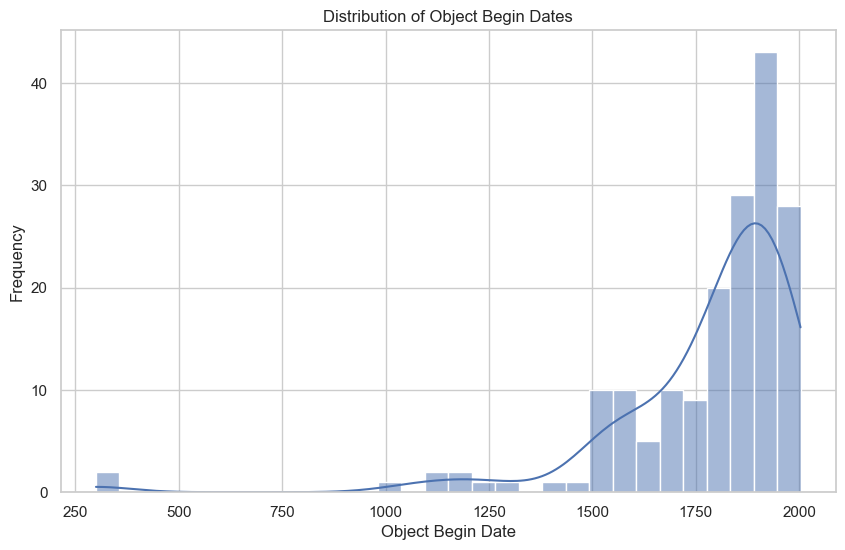

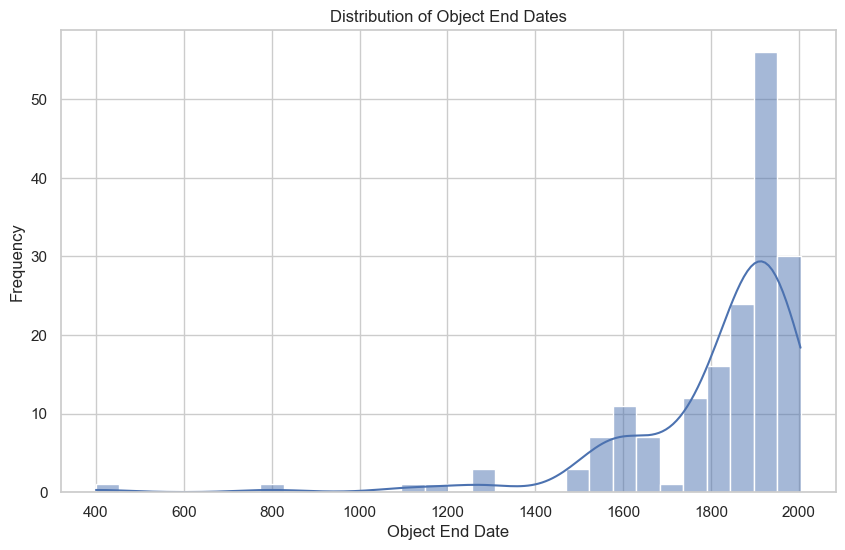

In [53]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Read in the cleaned dataset
cleaned_data = pd.read_csv('cleaned_artworks.csv')

# Display the first few rows of the cleaned dataset
cleaned_data.head()

# Exploratory Data Analysis
# Observations on the distribution of Object Begin Dates
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Object Begin Date'], bins=30, kde=True)
plt.title('Distribution of Object Begin Dates')
plt.xlabel('Object Begin Date')
plt.ylabel('Frequency')
plt.show()

# Observations on the distribution of Object End Dates
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Object End Date'], bins=30, kde=True)  # Add the missing closing parenthesis here
plt.title('Distribution of Object End Dates')
plt.xlabel('Object End Date')
plt.ylabel('Frequency')
plt.show()

***Observations:***

- Object Begin Date: The distribution of Object Begin Dates shows a peak in frequency around specific years, indicating that most artworks were created during certain periods. The presence of a smooth curve suggests a gradual increase or decrease in production over time.

- Object End Date: The distribution of Object End Dates also displays notable peaks, which may reflect periods of high artistic activity or trends within specific art movements. Similar to the begin dates, the curve indicates trends in when artworks were completed, with some years standing out more prominently.

Overall, both distributions provide insight into the timeframes during which artworks were created and completed, allowing for further exploration of historical and cultural contexts.

## Observations on Department

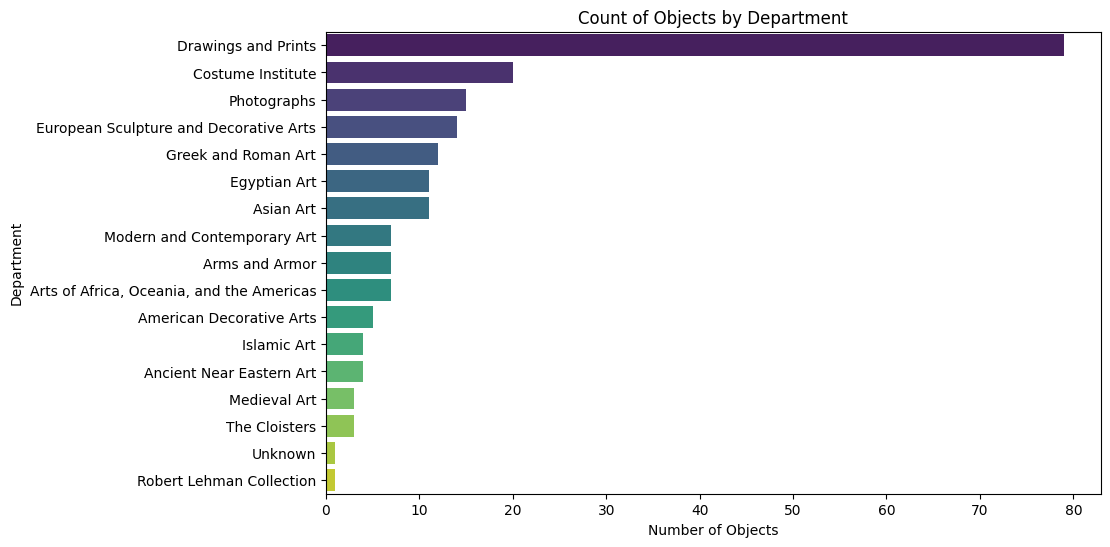

In [37]:
# Count plot for the Department column
plt.figure(figsize=(10, 6))
sns.countplot(y='Department', data=cleaned_data, order=cleaned_data['Department'].value_counts().index, palette='viridis')
plt.title('Count of Objects by Department')
plt.xlabel('Number of Objects')
plt.ylabel('Department')
plt.show()

**Observations**
* The distribution of shows that the Drawing and Prints department has more number of objects than any other department.
* And the Robert Lehman Collection has the least.

## Observations on Object Begin and Object End Dates

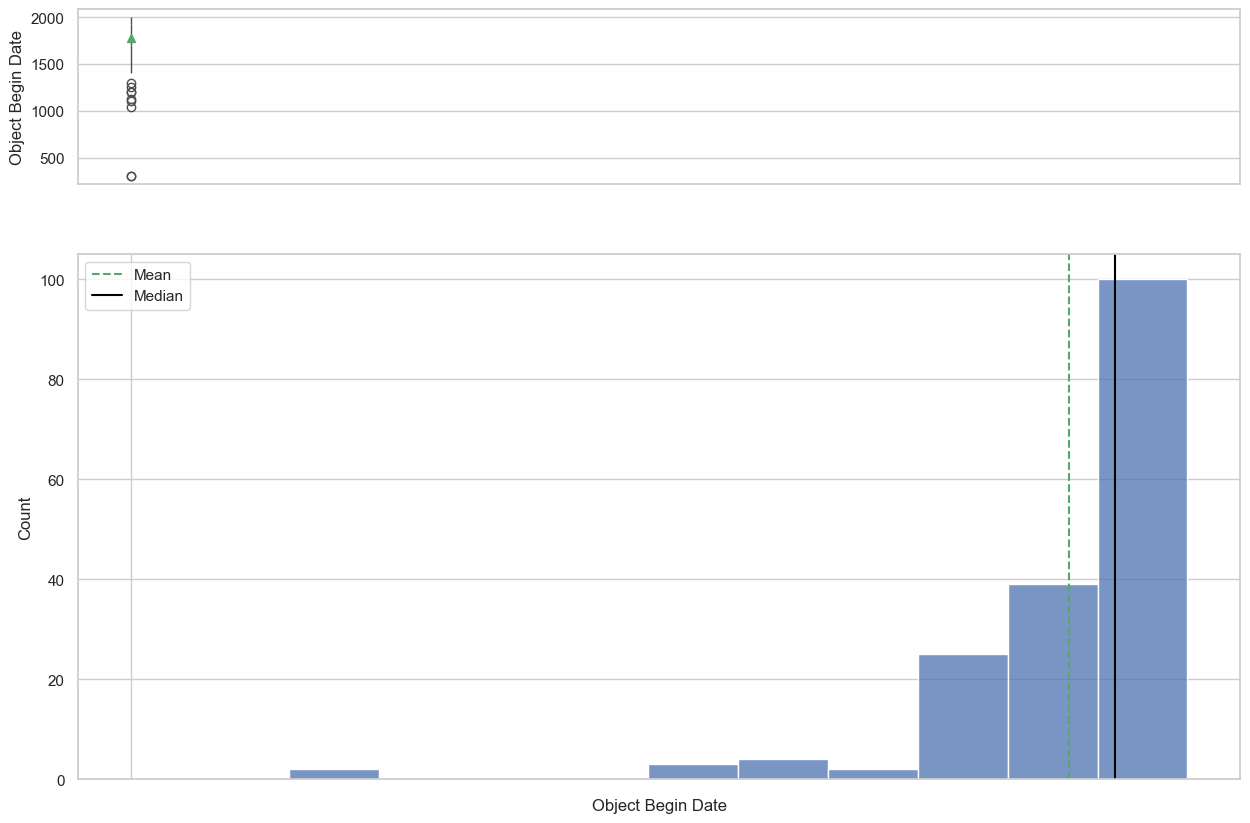

In [50]:
# Ensure 'Object Begin Date' is numeric, dropping errors and missing values
data['Object Begin Date'] = pd.to_numeric(data['Object Begin Date'], errors='coerce')

# Call the histogram_boxplot function for 'Object Begin Date', ensuring to drop any missing values
histogram_boxplot(data['Object Begin Date'].dropna(), bins=10)  # Specify number of bins

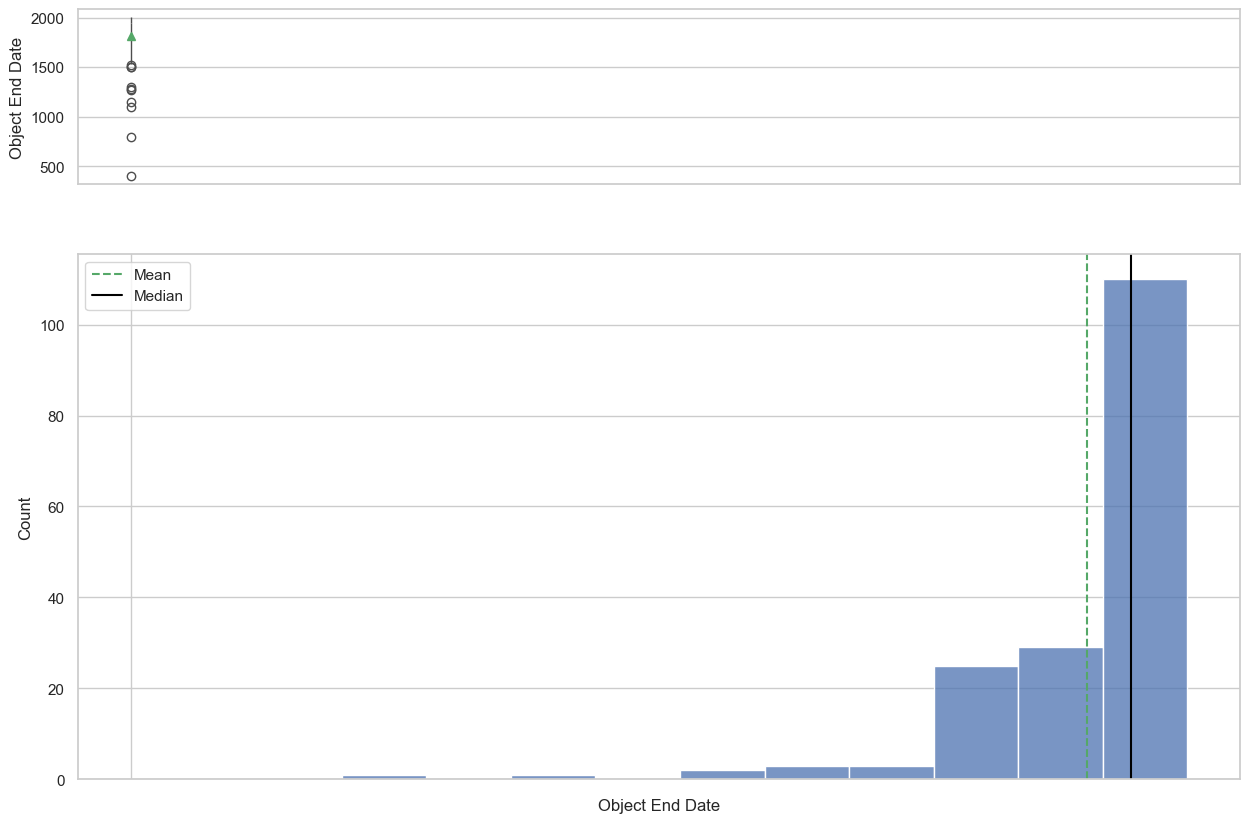

In [51]:
# Ensure 'Object End Date' is numeric, dropping errors and missing values
data['Object End Date'] = pd.to_numeric(data['Object End Date'], errors='coerce')

# Call the histogram_boxplot function for 'Object End Date', ensuring to drop any missing values
histogram_boxplot(data['Object End Date'].dropna(), bins=10)  # Specify number of bins

***Observations*** on **Object Begin Date** and **Object End Date**:

### Object Begin Date:
1. **Main Years**: Many objects were created in certain years, showing when the most activity occurred.
2. **Average Year**: The median line indicates the typical year most objects were made.
3. **Outliers**: Some objects were made much earlier or later than others, which may be unique items.
4. **Year Range**: The spread shows the years in which most objects were created.

### Object End Date:
1. **Main Years**: The histogram may show when most objects ended their use or were retired.
2. **Average Year**: The median line shows the typical year when objects stopped being used.
3. **Outliers**: Some objects had unusually short or long lifespans compared to others.
4. **Year Range**: The spread indicates how varied the end years are for different objects.

### Combined Insights:
- **Creation vs. Retirement**: Comparing begin and end dates helps us see patterns in how long objects are kept.
- **Trends**: Consistent patterns can show changes in how objects are made or used over time.
- **Activity Gaps**: Large gaps between begin and end dates might suggest periods when fewer objects were created or acquired.

These points give a clear view of how the creation and end dates of objects relate to each other.

##  Univariate Analysis

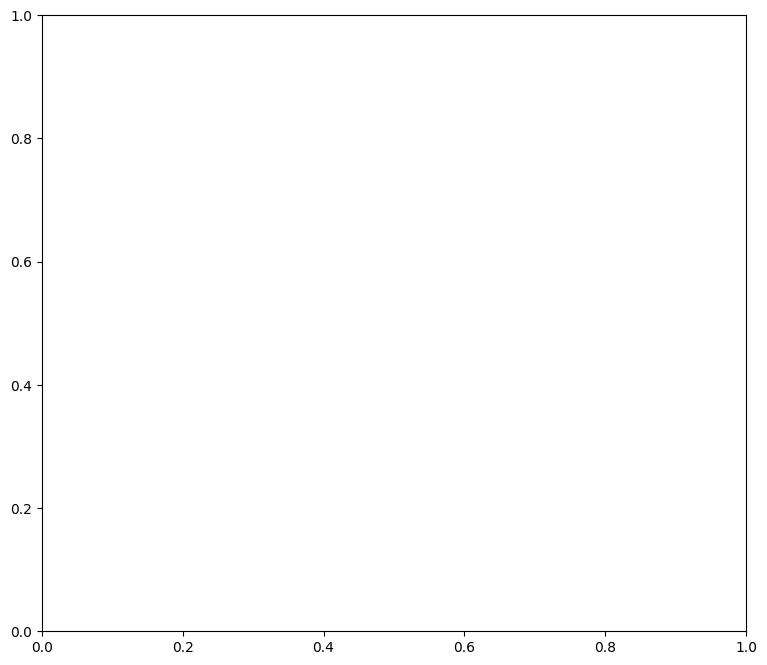

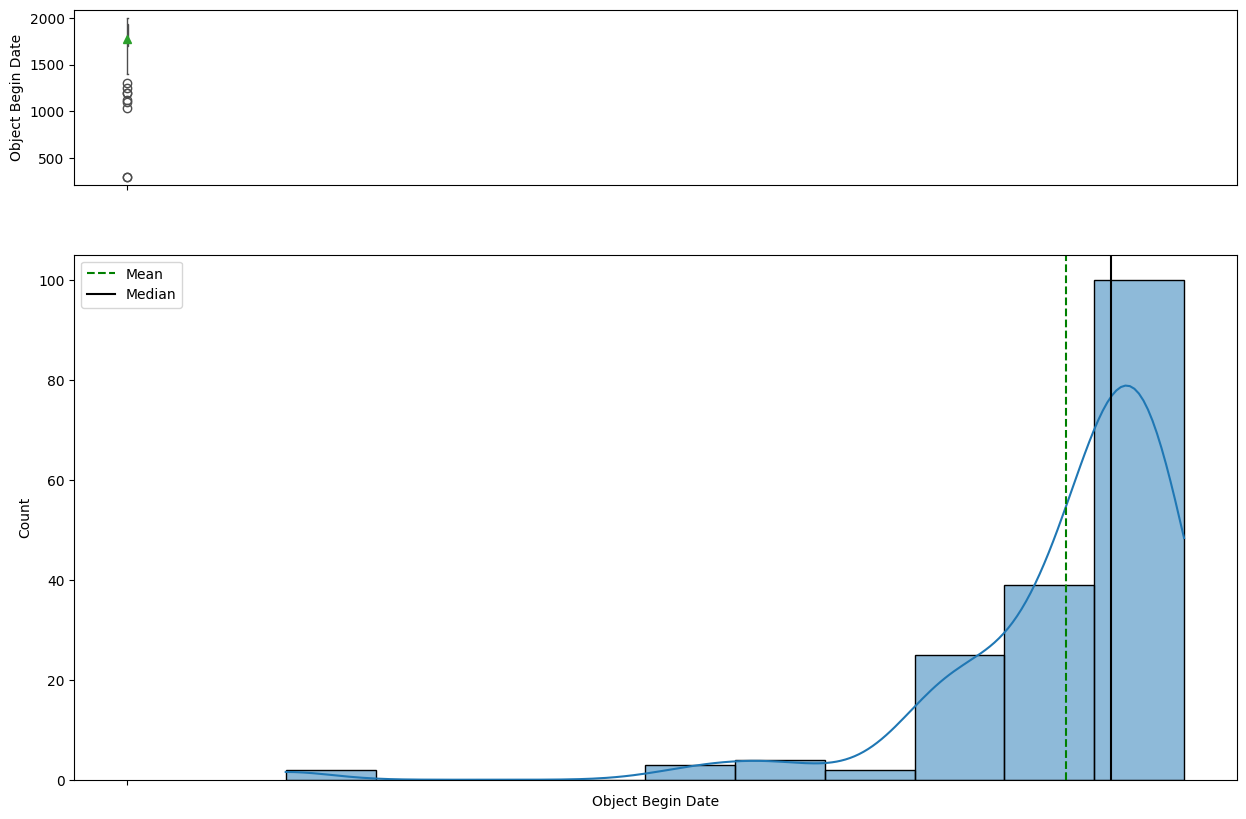

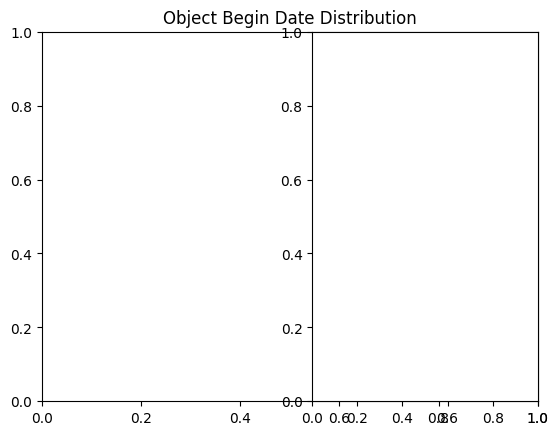

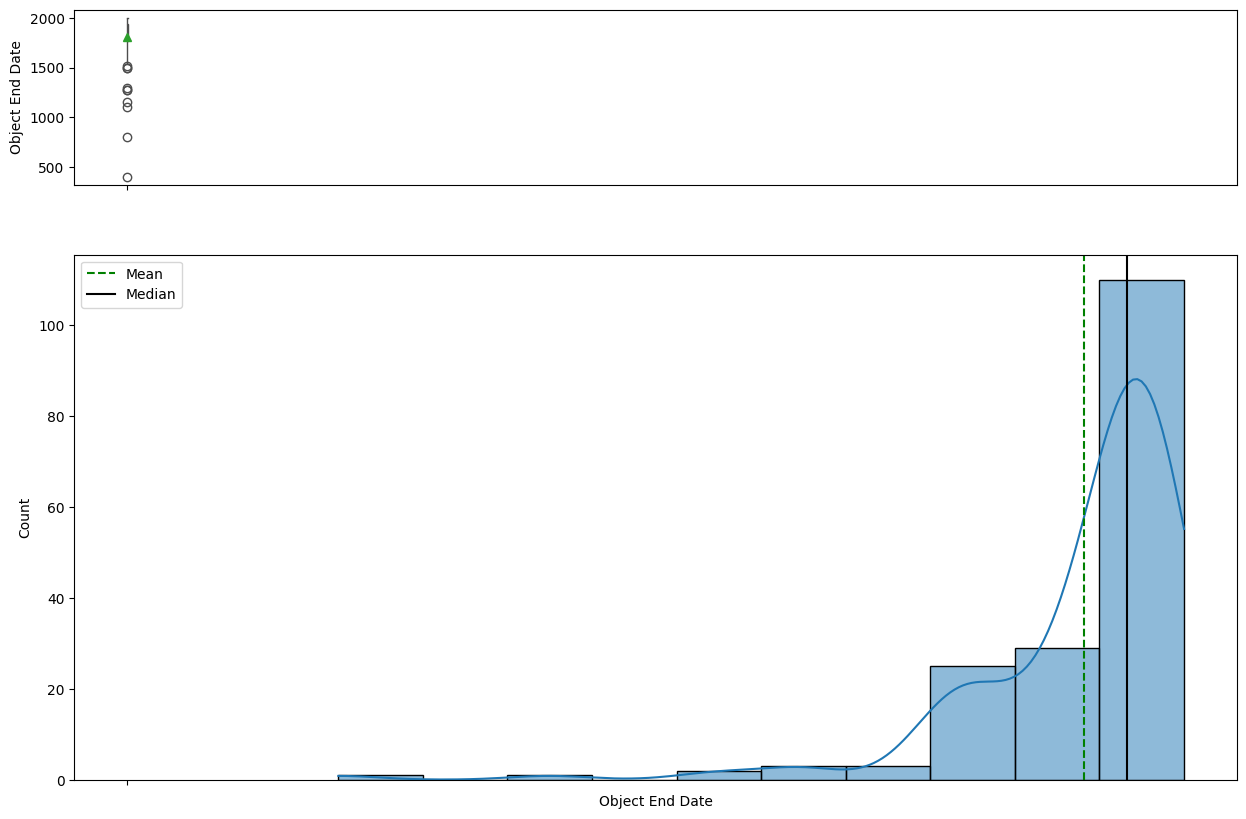

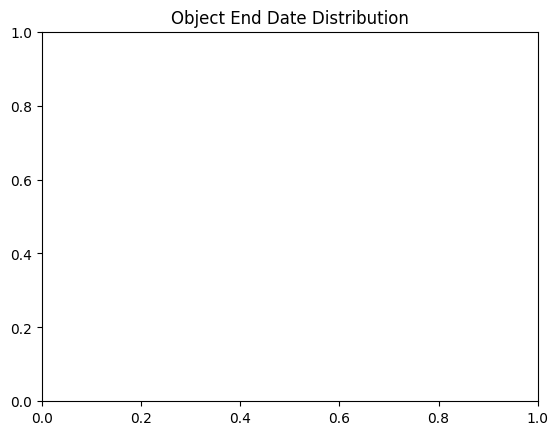

In [39]:
# Clean the Object Begin Date and Object End Date for analysis (convert NaT to np.nan)
data = pd.DataFrame(cleaned_data)
data['Object Begin Date'] = pd.to_numeric(data['Object Begin Date'], errors='coerce')
data['Object End Date'] = pd.to_numeric(data['Object End Date'], errors='coerce')

# Plot histograms and boxplots for the numerical columns
plt.figure(figsize=(20, 8))

# Analyze 'Object Begin Date'
plt.subplot(1, 2, 1)
histogram_boxplot(data['Object Begin Date'].dropna(), bins=10, kde=True)
plt.title('Object Begin Date Distribution')

# Analyze 'Object End Date'
plt.subplot(1, 2, 2)
histogram_boxplot(data['Object End Date'].dropna(), bins=10, kde=True)
plt.title('Object End Date Distribution')

plt.show()

### Brief Observations

1. **Date Distribution**: Most objects' 'Object Begin Date' and 'Object End Date' are concentrated in the 18th and 19th centuries, indicating a focus on artifacts from this period.

2. **Outliers**: Some objects have significantly older or newer dates, suggesting potential outliers that may influence the analysis.

3. **Central Tendency**: Differences between the mean and median for both date columns indicate potential skewness in the distributions.

4. **Missing Values**: NaT entries in the date columns could affect the overall analysis and should be addressed.

5. **Department and Culture**: Analyzing the representation of different departments and cultures can provide insights into the collection's diversity.

6. **Correlation**: There may be a correlation between 'Object Begin Date' and 'Object End Date' that warrants further investigation.

## Bivariate Analysis

Plot bivariate charts between variables to understand their interaction with each other.

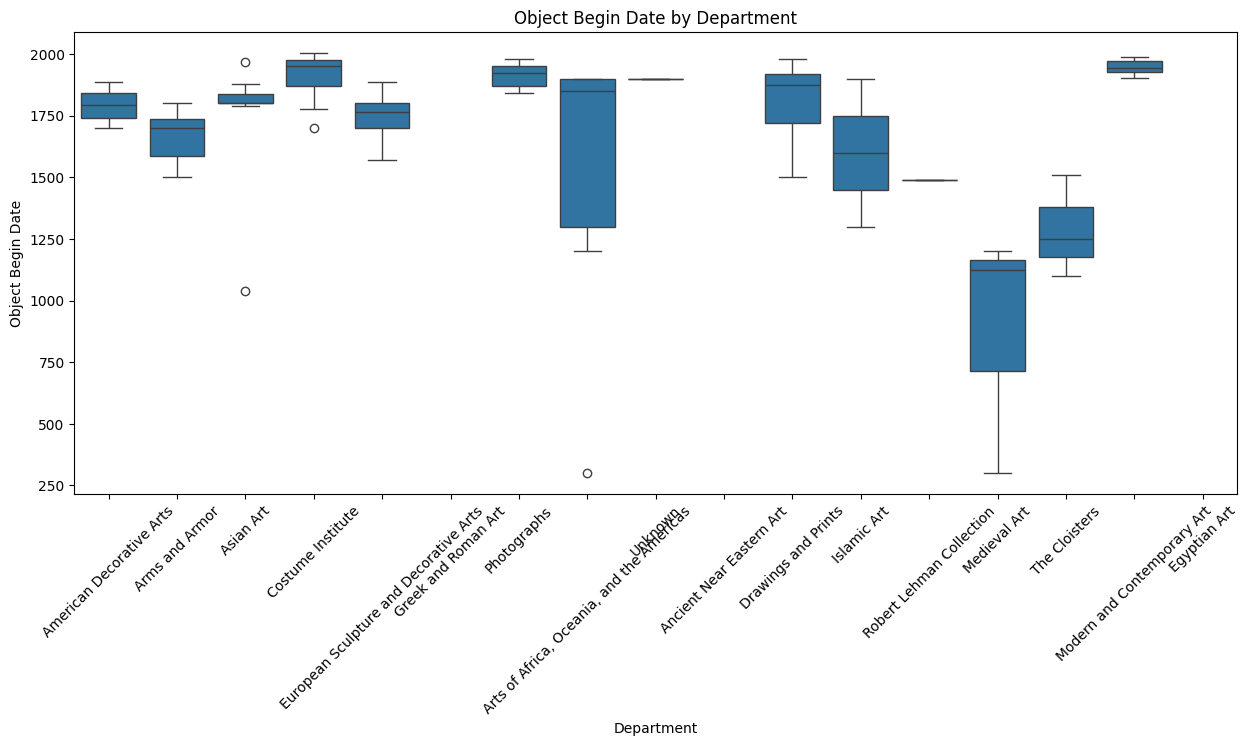

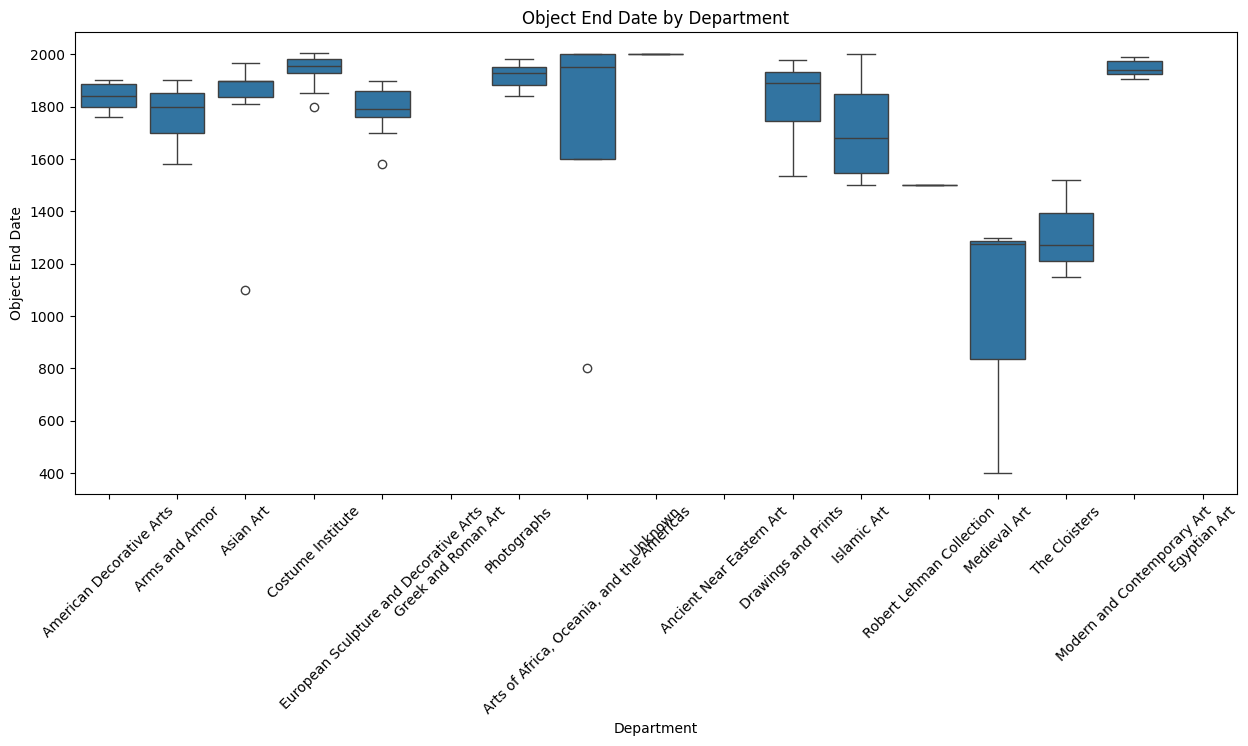

In [35]:
# Boxplots to visualize the relationship between Department and Object Begin Date
plt.figure(figsize=(15, 6))
sns.boxplot(x='Department', y='Object Begin Date', data=data)
plt.title('Object Begin Date by Department')
plt.xticks(rotation=45)
plt.show()

# Boxplots to visualize the relationship between Department and Object End Date
plt.figure(figsize=(15, 6))
sns.boxplot(x='Department', y='Object End Date', data=data)
plt.title('Object End Date by Department')
plt.xticks(rotation=45)
plt.show()

### Observations from Boxplots

1. **Variability Across Departments**: Different departments show considerable variability in 'Object Begin Date' and 'Object End Date', indicating diverse collections in terms of age.

2. **Outliers**: Some departments exhibit notable outliers, particularly in the 'Object Begin Date', suggesting a few artifacts are significantly older than most in that department.

3. **Age of Collections**: Certain departments (e.g., "Arms and Armor") tend to have earlier 'Object Begin Dates' compared to others (e.g., "Asian Art"), reflecting historical significance or acquisition focus.

4. **Department Trends**: The 'Object End Date' shows that most departments have more recent artifacts, with some showing minimal range, implying a concentrated period of activity in their collection history.

5. **Potential Data Issues**: Any departments with sparse data points or unclear distributions may require further investigation to ensure accuracy in the analysis.

### Bivariate Scatter Plots

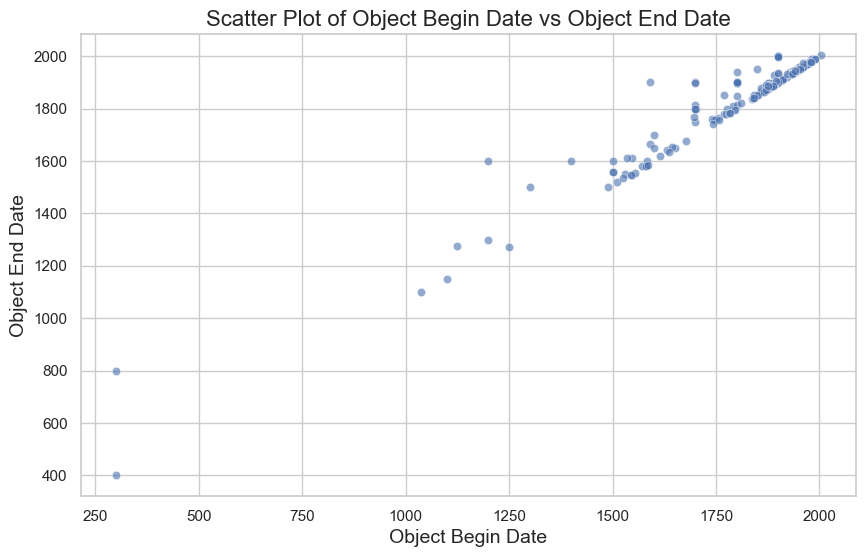

In [42]:
# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Object Begin Date', y='Object End Date', data=data, alpha=0.6)

# Adding titles and labels
plt.title('Scatter Plot of Object Begin Date vs Object End Date', fontsize=16)
plt.xlabel('Object Begin Date', fontsize=14)
plt.ylabel('Object End Date', fontsize=14)

# Show the plot
plt.show()

***Observations***
* There is clear increasing trend in monthly bookings
* Bookings in June are almost 1.5 times that of Jan

### Relationship between credit line, medium and department

#### Count of Objects by Medium and Department

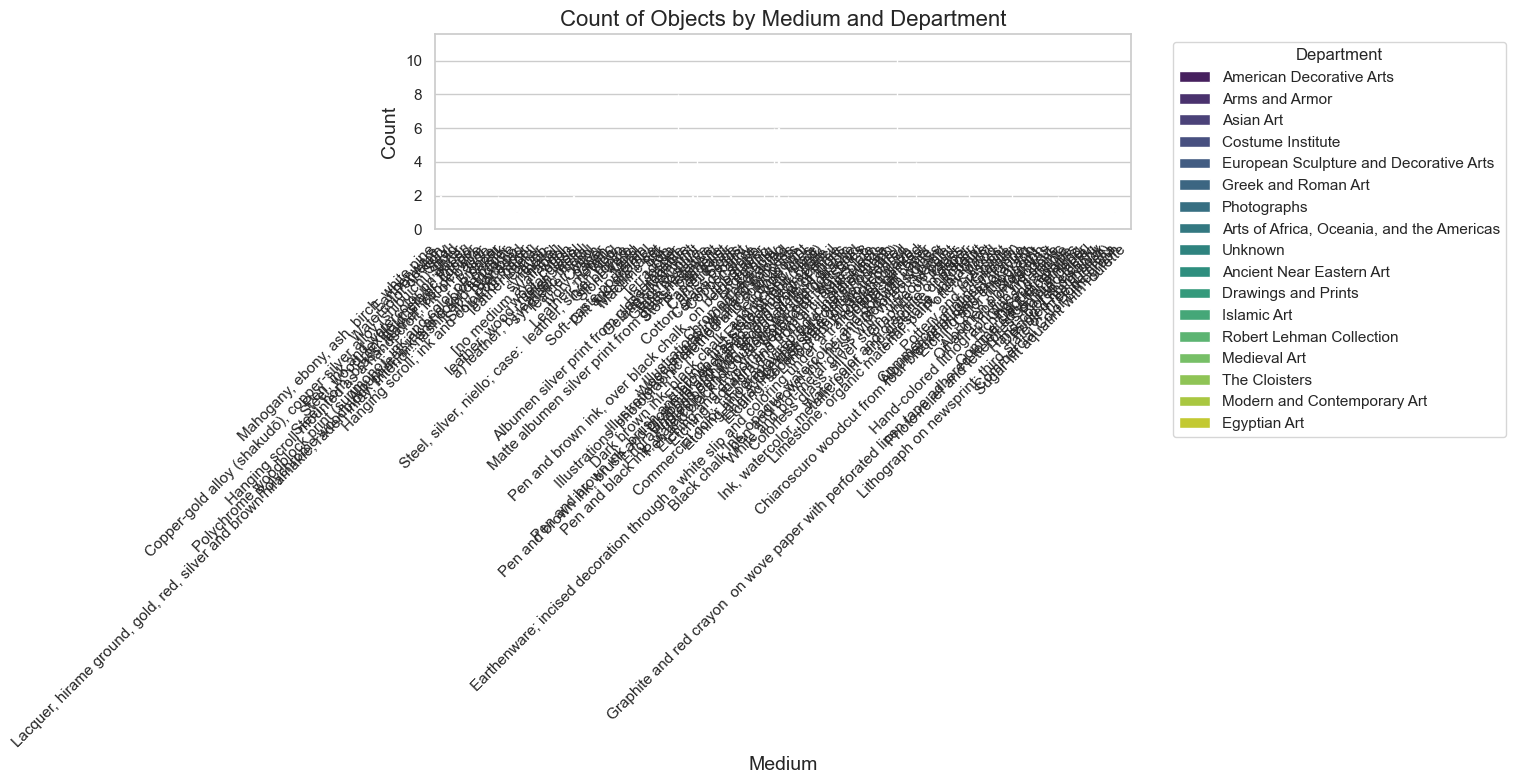

In [43]:
# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Create a count plot for Medium by Department
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='Medium', hue='Department', palette='viridis')
plt.title('Count of Objects by Medium and Department', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Medium', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Relationship between Credit Line and Department

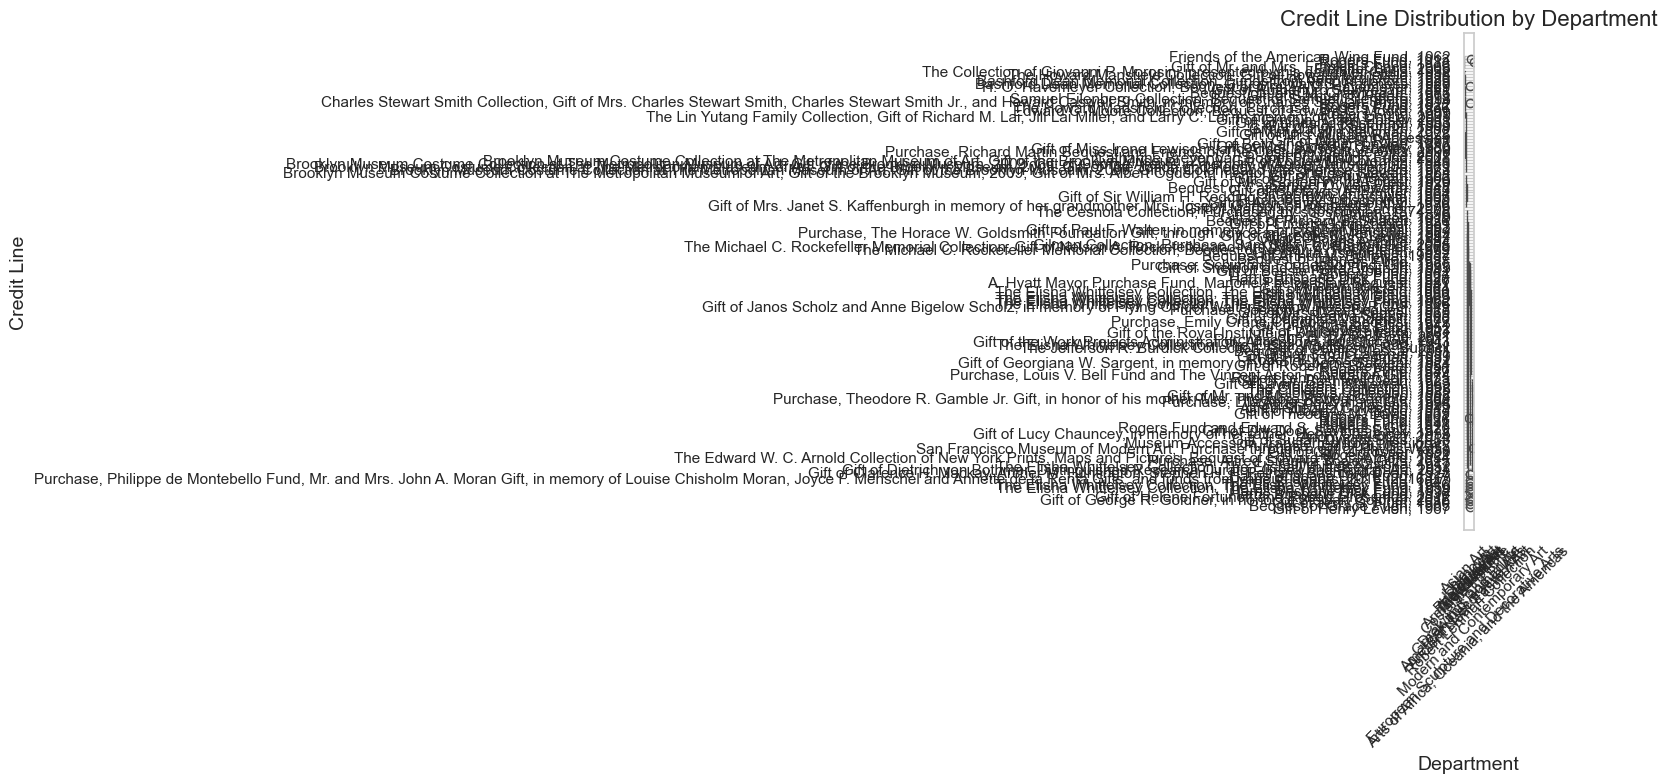

In [44]:
# Create a box plot for Credit Line by Department
plt.figure(figsize=(15, 8))
sns.boxplot(x='Department', y='Credit Line', data=data)
plt.title('Credit Line Distribution by Department', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Credit Line', fontsize=14)
plt.tight_layout()
plt.show()

#### Heatmap of Medium vs Department

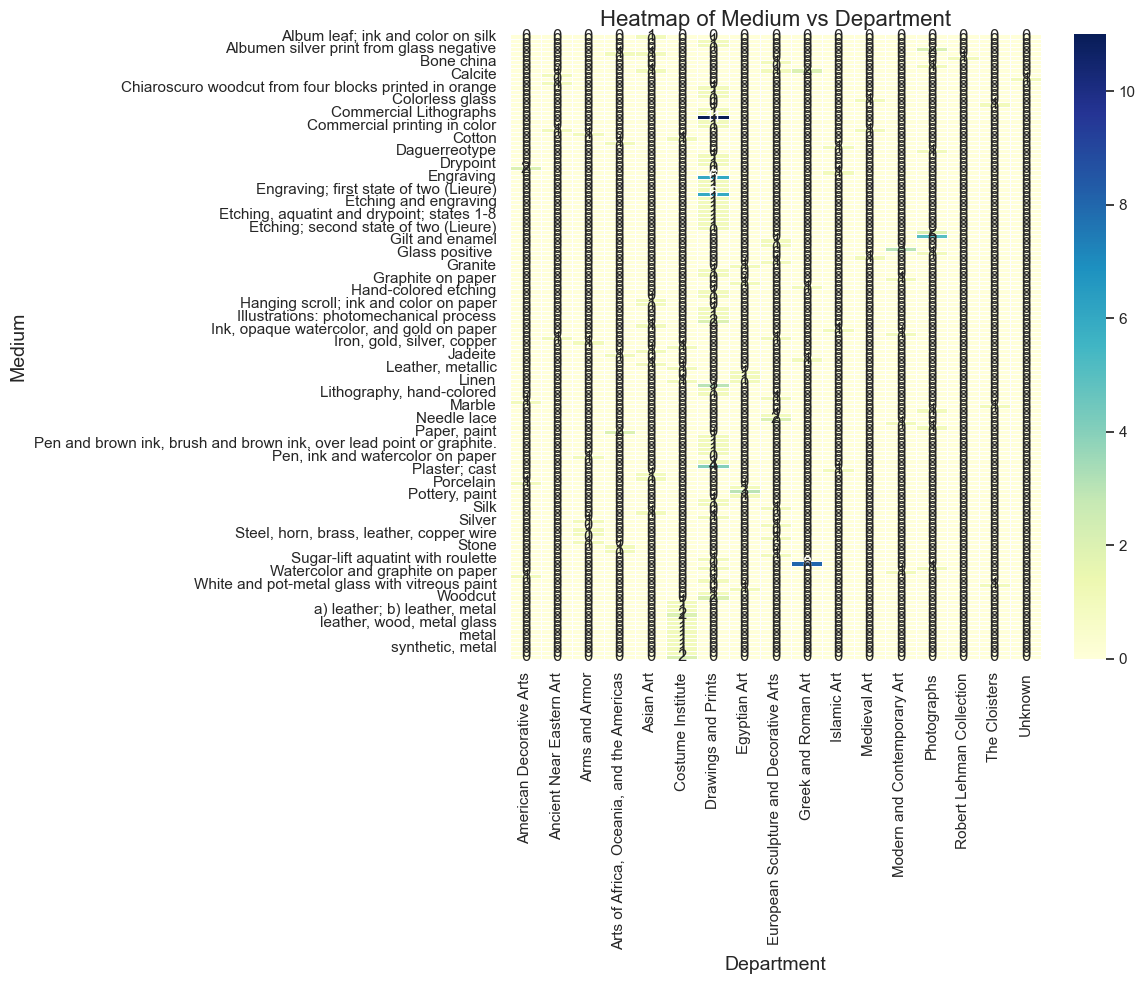

In [45]:
# Create a pivot table for Medium and Department
pivot_table = data.pivot_table(index='Medium', columns='Department', values='Object ID', aggfunc='count', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Medium vs Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Medium', fontsize=14)
plt.tight_layout()
plt.show()

***Brief Observations***

1. **Medium Distribution**:
   - Certain mediums are more prevalent in specific departments, indicating specialization. For example, some departments may have a higher count of specific mediums like ceramics or textiles.

2. **Credit Line Variation**:
   - The box plot reveals differing distributions of credit lines across departments, with some departments exhibiting a wider range of funding amounts, suggesting varying acquisition strategies or budgets.

3. **Medium and Department Heatmap**:
   - The heatmap highlights the concentration of mediums within departments, showing which departments focus on specific types of materials and potentially revealing areas of expertise.

4. **Trends**:
   - Overall trends indicate a relationship between specific mediums and departments, with some departments having a strong reliance on certain mediums and credit lines, pointing to potential areas for further investigation or strategic development.

## Multivariate Analysis

Multivariate analysis on the dataset, to analyze the relationship between three relevant columns: Department, Object Begin Date, and Medium. We can visualize these relationships using a combination of scatter plots, box plots, and pair plots to understand how these variables interact with one another

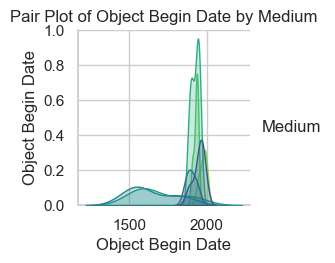

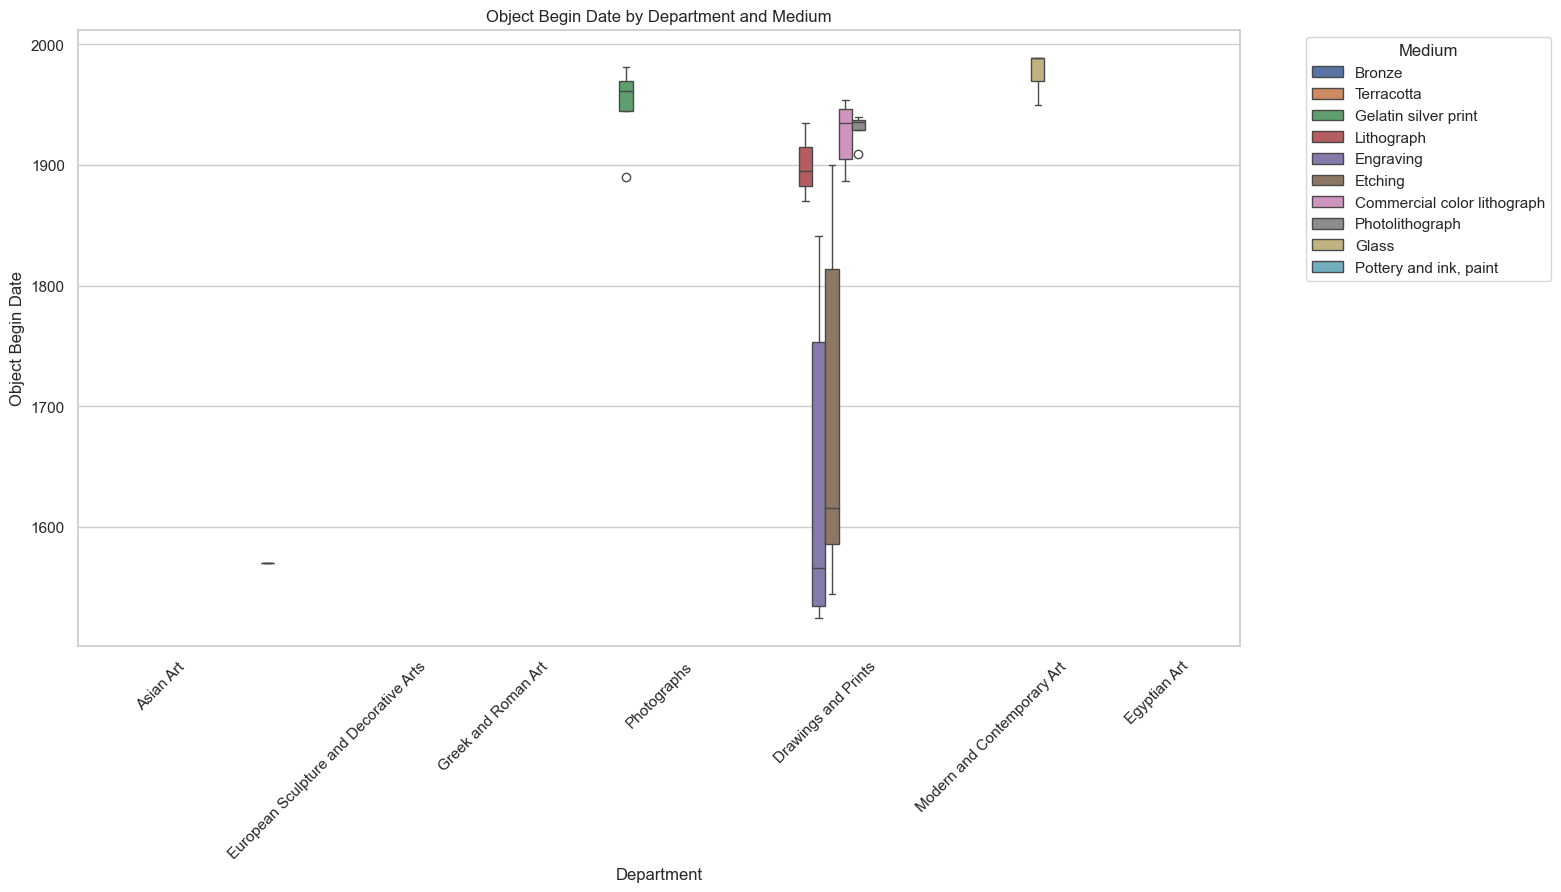

In [46]:
# Convert 'Object Begin Date' to numeric if it's not already
data['Object Begin Date'] = pd.to_numeric(data['Object Begin Date'], errors='coerce')

# Pair plot to visualize relationships between Object Begin Date, Medium, and Department
# First, we need to limit the number of unique mediums for better visualization
medium_counts = data['Medium'].value_counts()
top_mediums = medium_counts.head(10).index
filtered_data = data[data['Medium'].isin(top_mediums)]

# Pair plot of Object Begin Date and Department with Medium as hue
sns.pairplot(filtered_data, vars=['Object Begin Date'], hue='Medium', palette='viridis')
plt.title('Pair Plot of Object Begin Date by Medium')
plt.show()

# Box plot to visualize Object Begin Date across Departments, separated by Medium
plt.figure(figsize=(15, 8))
sns.boxplot(x='Department', y='Object Begin Date', hue='Medium', data=filtered_data)
plt.title('Object Begin Date by Department and Medium')
plt.xticks(rotation=45)
plt.legend(title='Medium', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

***Observations***

1. **Pair Plot**:
   - Some mediums are linked to specific time periods for object acquisition. Certain mediums appear more in recent years, while others are older.

2. **Box Plot**:
   - Different departments show varying ranges of object begin dates. Some departments have a broader historical collection than others.
   - Each medium within a department has unique patterns in acquisition dates, reflecting the department's focus.

3. **Medium Focus**:
   - Departments tend to specialize in certain mediums, which affects when they acquire objects. 

4. **Trends Over Time**:
   - The analysis shows how collecting practices have changed over time, with some departments shifting their focus based on the medium.

# **Conclusion and Recommendations**

## Conclusion
We analyzed a dataset of approximately 30,000 hourly Uber pickup records from the boroughs of New York City, covering every day in the first six months of 2015. The primary focus of this analysis was the number of pickups. From both an environmental and business standpoint, it's inefficient for cars to be idle in areas of low demand or for streets to be congested during off-peak times. Therefore, we aimed to identify the factors influencing pickup rates and their respective impacts.

### Our key findings include:

- Manhattan Dominance: Uber pickups are most concentrated in the Manhattan area of New York.
- Weather Impact: Surprisingly, weather conditions do not significantly affect the number of Uber pickups.
- Rising Demand: There has been a consistent increase in Uber demand from January to June.
- Weekend Activity: Pickup rates are higher on weekends compared to weekdays.
- Evening Trust: New Yorkers show a preference for using Uber services when going out in the evenings.
- Commuting Patterns: Uber usage peaks during regular office commute hours, with demand rising from 6 AM to 10 AM, dipping slightly before - increasing again around noon, and reaching its highest point between 7 PM and 8 PM.
- Low Monday Demand: Further investigation is warranted to understand the reasons behind lower demand for Ubers on Mondays.

## Recommendations for Business
- Focus on Manhattan: Given its established market, Manhattan should continue to be a priority for Uber. However, Brooklyn, Queens, and the Bronx present significant growth opportunities.
- Sustain Demand Growth: The steady increase in Uber rides over recent months should be leveraged to maintain momentum in user engagement and services.
- Peak Availability: Ensure cab availability during peak office commute hours on weekdays and late evenings on Saturdays to meet high demand.
- Saturday Night Strategy: Since demand peaks on Saturday nights, prioritizing cab availability during this time is crucial.
- Data-Driven Optimization: Acquire data on fleet size and availability to enhance understanding of the demand-supply balance, and consider building a machine learning model to accurately predict hourly pickups for optimizing fleet management in different areas.
- Dynamic Pricing Model: Gather more data on pricing strategies to develop a model that can predict optimal pricing, ensuring competitive yet profitable fare rates.

## Further Analysis
Working vs. Non-Working Days: Conduct a deeper analysis to explore variations in cab demand between working days and non-working days. This can involve categorizing weekends and holidays as non-working days versus weekdays as working days.
Data Cleaning: Eliminate boroughs with negligible pickup numbers from the analysis to focus on more relevant insights.
Automated Data Profiling: Utilize tools like Pandas Profiling for automated data profiling to gain additional insights into the dataset.

In [ ]:
# let us try pandas-profiling now and see how does it simplifies the EDA
#!pip install pandas-profiling==2.8.0

Or,
Install pandas-profiling using anaconda prompt, Use the command ->
conda install -c conda-forge pandas-profiling

In [54]:
from ydata_profiling import ProfileReport

prof = ProfileReport(data)
prof.to_notebook_iframe()  

# This generates a detailed profile report of the dataset using the `ydata_profiling` library, 
# providing insights into distributions, missing values, and correlations. 
# This helps in understanding data quality and characteristics for further analysis in a Jupyter notebook.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
# to save report obtained via pandas profiling
prof.to_file('output.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]